<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E6%89%93%E9%80%A0%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x

In [0]:
import tensorflow as tf

##1. 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##2. 欣賞數據集內容


In [26]:
len(x_train)

60000

In [27]:
len(x_test)

10000

##觀察資料
### 有十個類別

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
n=2000
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 223, 220,
        231, 233, 231, 218, 191,  33,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 248, 228, 215,
        217, 219, 219, 220, 235, 234, 107,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,  69, 245, 221, 229, 213,
        219, 206, 210, 217, 222, 218, 243,  64,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 231, 224, 230, 222,
        217, 222, 224, 215, 215, 222, 219,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 193, 238, 216, 222, 218, 213,
        211, 208, 210, 217, 224, 217, 222, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [30]:
y_train[n]

4

##將顏色稍微改變了一下

這是 Coat


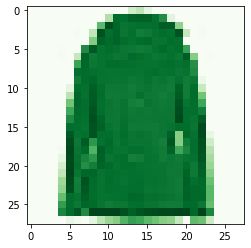

In [31]:
n = 2000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greens');

##看一下每個種類長怎樣

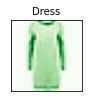

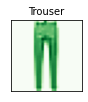

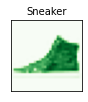

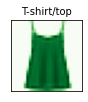

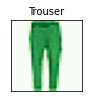

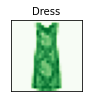

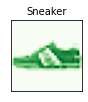

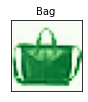

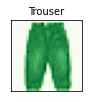

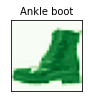

In [40]:
pick = np.random.choice(60000, 10, replace=False)

for i in range(10):
    n = pick[i]
    a = plt.figure(figsize=(15,15))
    ax = a.add_subplot(1,10,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greens')

##3. 資料整理

###先將資料標準化

In [0]:
x_train = x_train/300
x_test = x_test/300

In [42]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

###將y改成one hot encoding，因為有十種，所以輸出十種

In [44]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[2000]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

##4.打造神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



##組裝一台空白學習機
###這邊改變了神經元的數量改為200,200,100,輸入是784維,總共三層，激發函數依然選用relu

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))


###組裝神經網路

###誤差函數改成MAE,這邊我改變了learning rate改為0.099

In [0]:
model.compile(loss='mae', optimizer=SGD(lr=0.099), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


###訓練
一個epoch要跑（訓練樣本數/Batch_Size）個Iterations，這裡改變了batch_size,每做25題就檢查一次,epochs改成做40次

In [60]:
model.fit(x_train, y_train, batch_size=25, epochs=40)

Epoch 1/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0206 - accuracy: 0.9164
Epoch 2/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0194 - accuracy: 0.9158
Epoch 3/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0188 - accuracy: 0.9165
Epoch 4/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0184 - accuracy: 0.9175
Epoch 5/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0180 - accuracy: 0.9182
Epoch 6/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0177 - accuracy: 0.9189
Epoch 7/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0175 - accuracy: 0.9194
Epoch 8/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0173 - accuracy: 0.9205
Epoch 9/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0171 - accuracy: 0.9212
Epoch 10/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.016

神經網路預測是: Dress


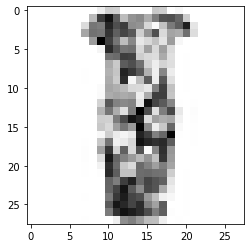

In [65]:
result = model.predict_classes(x_test)
n = 100
print('神經網路預測是:', class_names[result[n]])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

##訓練結果：
### 正確率：93.75%，較MSE正確率92.56%還要好

##組裝第二台函數學習機

###神經元數量，層數不變，改變batch size成100題檢查一次

In [0]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [0]:
model2.compile(loss='mae', optimizer=SGD(lr=0.099), metrics=['accuracy'])

In [76]:
model2.fit(x_train, y_train, batch_size=25, epochs=40)

Epoch 1/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0952 - accuracy: 0.5802
Epoch 2/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0583 - accuracy: 0.7238
Epoch 3/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0549 - accuracy: 0.7340
Epoch 4/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0534 - accuracy: 0.7392
Epoch 5/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0524 - accuracy: 0.7433
Epoch 6/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0518 - accuracy: 0.7452
Epoch 7/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0512 - accuracy: 0.7479
Epoch 8/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0508 - accuracy: 0.7499
Epoch 9/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0502 - accuracy: 0.7523
Epoch 10/40
2400/2400 [==============================] - 6s 2ms/step - loss: 0.050

神經網路預測是: Dress


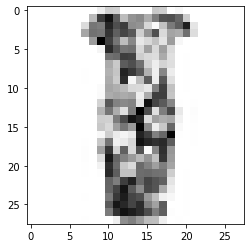

In [77]:
result = model2.predict_classes(x_test)
n = 100
print('神經網路預測是:', class_names[result[n]])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

##訓練結果：
### 正確率：77.11%，比Batch size＝25差很多

##組裝第三台函數學習機

###神經元數量，層數減少，batch size一樣25題檢查一次

In [0]:
model3 = Sequential()
model3.add(Dense(150, input_dim=784, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [0]:
model3.compile(loss='mae', optimizer=SGD(lr=0.099), metrics=['accuracy'])

In [80]:
model3.fit(x_train, y_train, batch_size=25, epochs=40)

Epoch 1/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0904 - accuracy: 0.6095
Epoch 2/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0595 - accuracy: 0.7216
Epoch 3/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0561 - accuracy: 0.7313
Epoch 4/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0545 - accuracy: 0.7365
Epoch 5/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0535 - accuracy: 0.7409
Epoch 6/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0527 - accuracy: 0.7436
Epoch 7/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0521 - accuracy: 0.7455
Epoch 8/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.7474
Epoch 9/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0513 - accuracy: 0.7489
Epoch 10/40
2400/2400 [==============================] - 5s 2ms/step - loss: 0.051

神經網路預測是: Dress


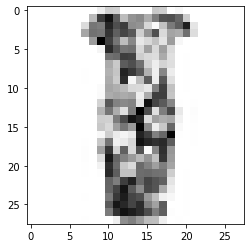

In [81]:
result = model3.predict_classes(x_test)
n = 100
print('神經網路預測是:', class_names[result[n]])

plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

##訓練結果：
###正確率：76.73%，比神經元個數200,100,100，三層還差


##總結
###本次作業在 誤差函數，神經元個數，層數，batch_size都有作更改
###可以發現，MAE比MSE正確率稍高一點
### batch size 變多，正確率下降
###神經元個數跟層數減少，正確率也會下降
